In [1]:
import seaborn as sns
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
df = df.dropna()

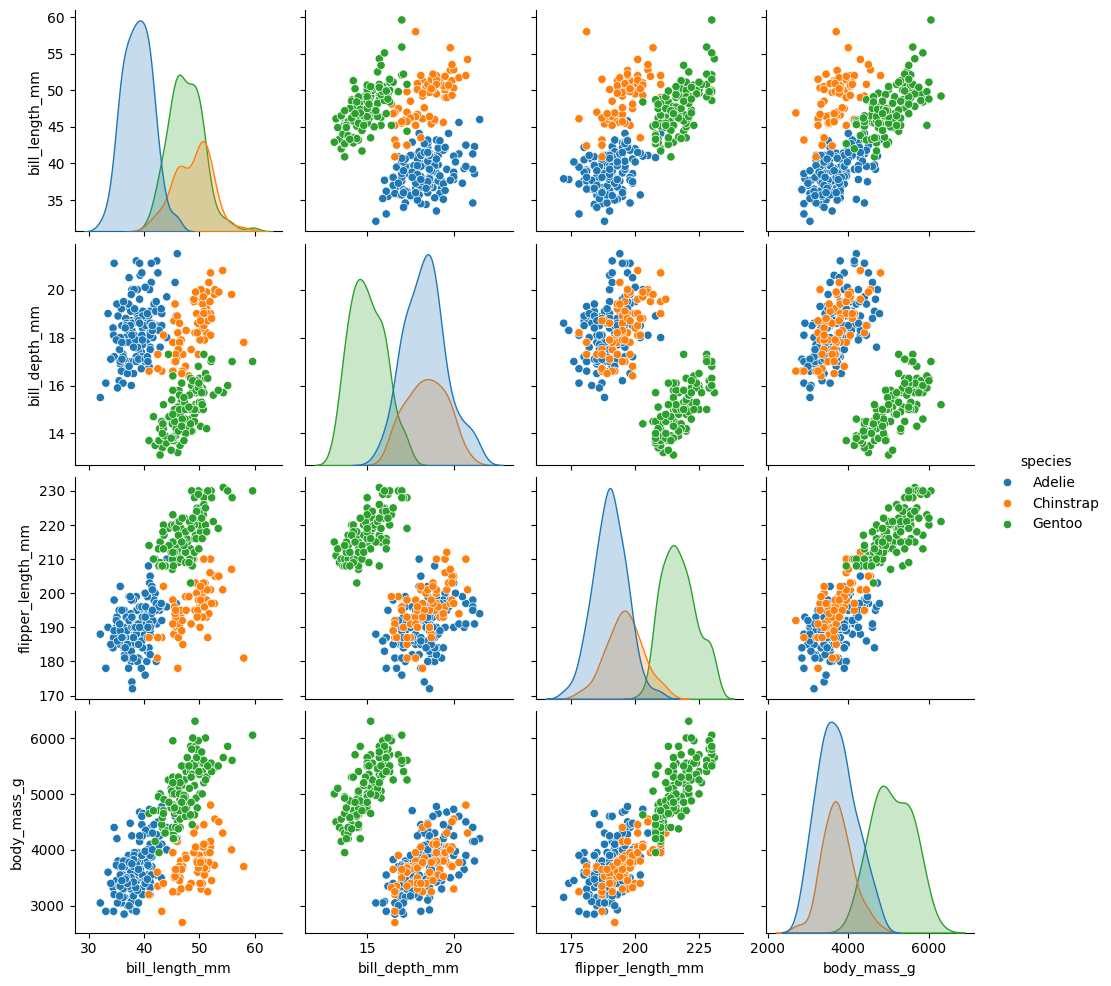

In [5]:
sns.pairplot(df,hue='species')
plt.show()

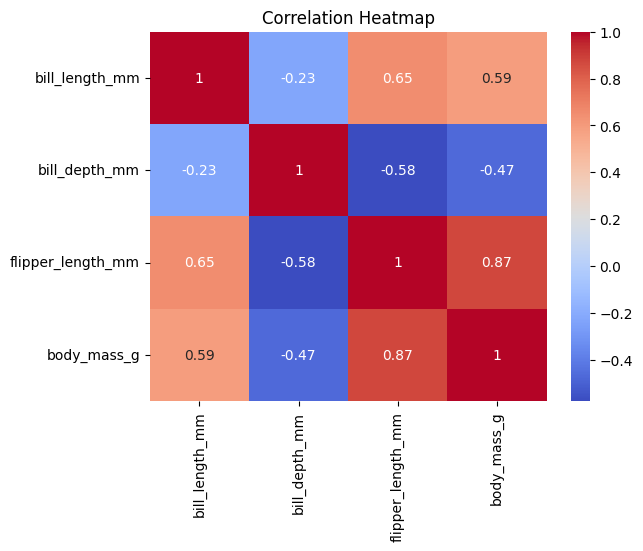

In [20]:
data = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


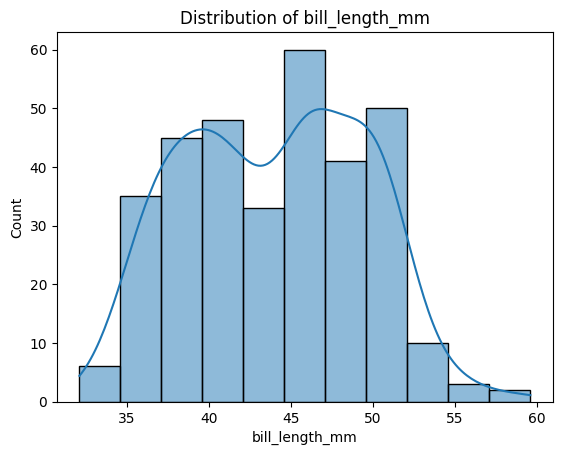

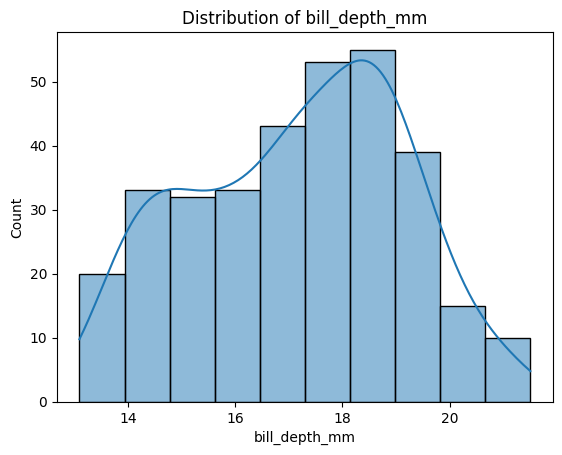

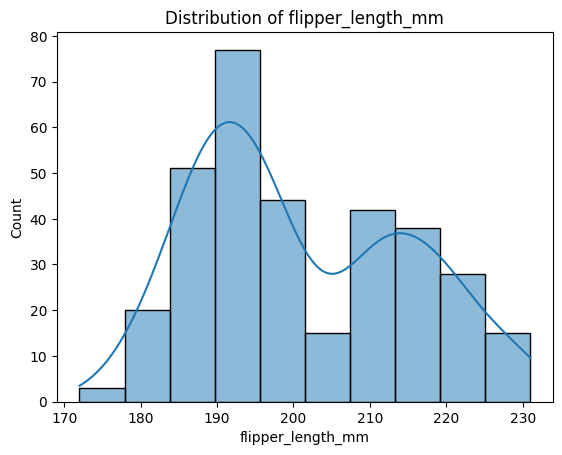

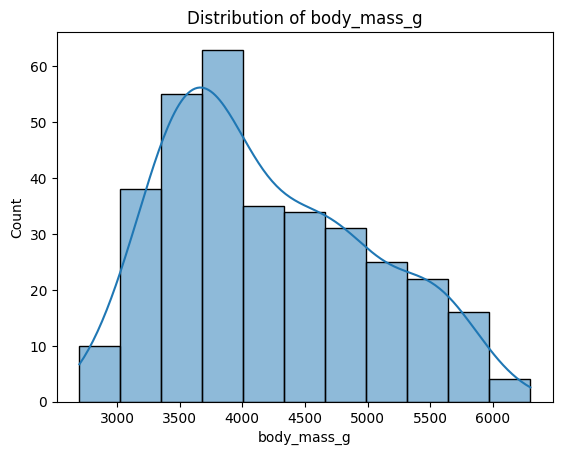

In [21]:
for col in ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']:
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


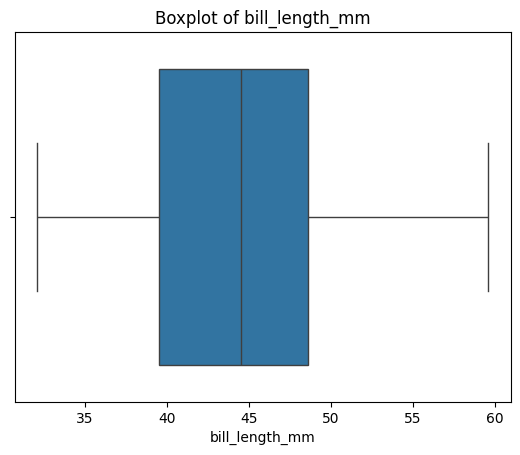

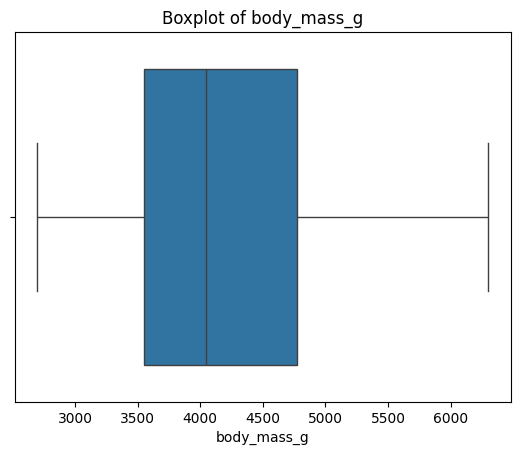

In [22]:
for col in ['bill_length_mm','body_mass_g']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [24]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_file("penguins_report.html")

c:\Users\Ashutosh\OneDrive\Desktop\Practicals\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 76.86it/s]


In [26]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('penguins_plots.pdf') as pdf:
    sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
    plt.title('Correlation Heatmap')
    pdf.savefig()
    plt.close()

    sns.histplot(df['bill_length_mm'],kde=True)
    plt.title('Distribution of Bill Length')
    pdf.savefig()
    plt.close()